Optimized Parameters:
A1: 0.008576183507390148
g1: 0.0
A2: 0.01
g2: 0.9893133324090615
kb1: 0.0007414490386493488
b1: 0.0
kb2: 1.1211134133509733
b2: 0.11752547323023911


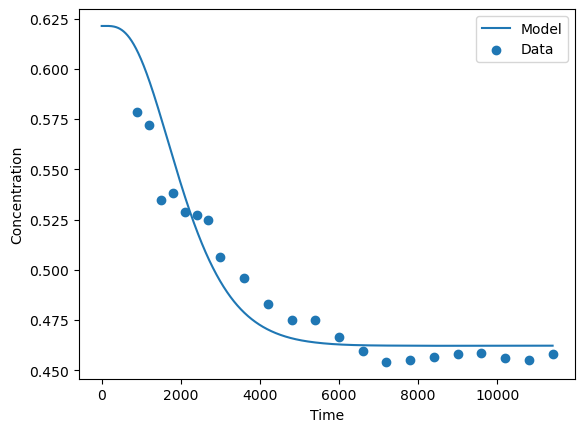

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Given data
Time = np.array([900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800,11400])
Concentration = np.array([0.578566855,0.571822728,0.534651156,0.538397726,0.52877613,0.527454823,0.524766233,0.506507457,0.496096529,0.483169536,0.474988175,0.474989016,0.466392069,0.459852499,0.4541979,0.455290747,0.456516051,0.458105913,0.458759685,0.456265564,0.455226078,0.458186968])

def generateODE3(t, m, A1, g1, A2, g2, kb1, b1,kb2,b2, V):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.6215                     # gm/(100 gm of mixed solvent)
    Ce = 0.383                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb1 * (s)**b1  + kb2*Vc*s**b2

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc

    return [dm00, dm10, dm01, dm11, dc]

def objective(params):
    A1, g1, A2, g2, kb1, b1, kb2, b2  = params
    V = 0.0002  # Volume, adjust as needed
    t_span = (0, 11400)  # Adjust this to match the maximum time in your data
    num_points = 11400
    initialConditions = [0, 0, 0, 0, 0.6213]
    sol = solve_ivp(
        lambda t, m: generateODE3(t, m, A1, g1, A2, g2, kb1, b1,kb2,b2, V),
        t_span,
        initialConditions,
        t_eval=np.linspace(t_span[0], t_span[1], num_points)
    )
    
    # Ensure that the interpolation is within the range of the solution
    interp_t = np.clip(Time, sol.t[0], sol.t[-1])
    
    # Interpolate the solution at the time points specified in Time
    interp_solution = interp1d(sol.t, sol.y[4])
    model_predictions = interp_solution(interp_t)
    error = np.sum((model_predictions - Concentration)**2)  # Sum of squared differences
    return error

# Initial guess for parameters
initial_guess =  [0.00001313983, 1, 0.00002593650, 1.43, 0.03, 0.19, 1.12,0.1172]
# Bounds for the parameters
bounds = [(0, 0.1),   # A1
          (0, 2),      # g1
          (0, 0.01),     # A2
          (0, 1),        # g2
          (0, 2),        # kb1
          (0, 2),          #b1
         (0, 2),         #kb2
         (0,2)]         # b2

# Minimize the objective function with bounds
result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=bounds)

# Extract the optimized parameters
A1_opt, g1_opt, A2_opt, g2_opt, kb1_opt, b1_opt, kb2_opt, b2_opt = result.x
print("Optimized Parameters:")
print("A1:", A1_opt)
print("g1:", g1_opt)
print("A2:", A2_opt)
print("g2:", g2_opt)
print("kb1:", kb1_opt)
print("b1:", b1_opt)
print("kb2:", kb2_opt)
print("b2:", b2_opt)

# Plot the optimized model against the data
t_span = (0, 11400)
num_points = 11400
initialConditions = [0, 0, 0, 0, 0.6213]
sol = solve_ivp(
    lambda t, m: generateODE3(t, m, A1_opt, g1_opt, A2_opt, g2_opt, kb1_opt, b1_opt, kb2_opt, b2_opt, 0.0002),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points)
)
plt.plot(sol.t, sol.y[4], label='Model')
plt.scatter(Time, Concentration, label='Data')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.show()

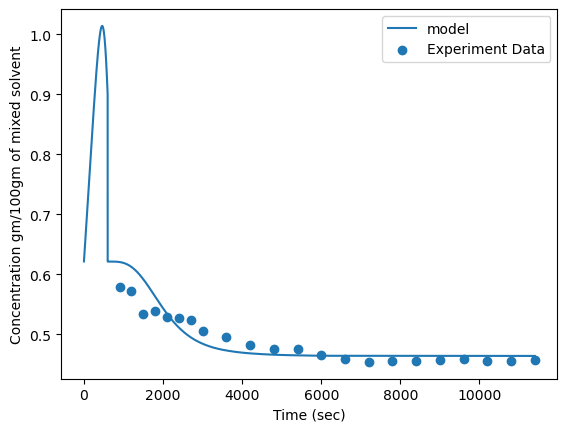

In [2]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.6215                     #gm/(100 gm of mixed solvent)
    Ce=0.383                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    #A1 = 8.83*10**(-5)   # m/s 
    #A2 = 9.15*10**(-5)              # m/s
    #g1 = 0.69
    #g2 = 1.414
    #kb = 161.0103                         # m3/sec
    #b = 0.03565
    #R = 8.314                        # joule\(k mol)
    #T = 303.14                       # kelvin
    #V = 0.0002                       # m3
   
    A1 = 0.021816049126891987               # m/s 
    A2 = 0.005734299647573935              # m/s
    g1 = 2
    g2 = 0.001
    kb = 0.0020125114470451676                        # m3/sec
    b = 0.001
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f=3.33*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0,599)
num_points_0=599
initialConditions = [0, 0, 0, 0,0.6215]
sol1 = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)
plt.plot(np.append(sol1.t,sol.t),np.append(sol1.y[4], sol.y[4]), label ="model")
plt.scatter(Time, Concentration, label='Experiment Data')
plt.xlabel("Time (sec)")
plt.ylabel("Concentration gm/100gm of mixed solvent")
plt.legend()
plt.show()

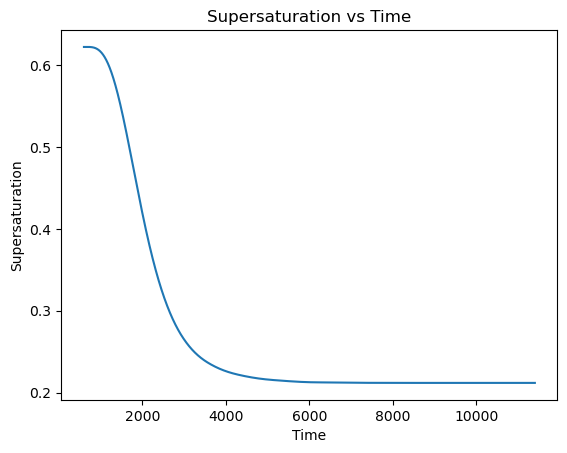

In [3]:
plt.plot(sol.t, (np.maximum(sol.y[4] - 0.383, 0) / 0.383))
plt.xlabel("Time")
plt.ylabel("Supersaturation")
plt.title("Supersaturation vs Time")
plt.show()

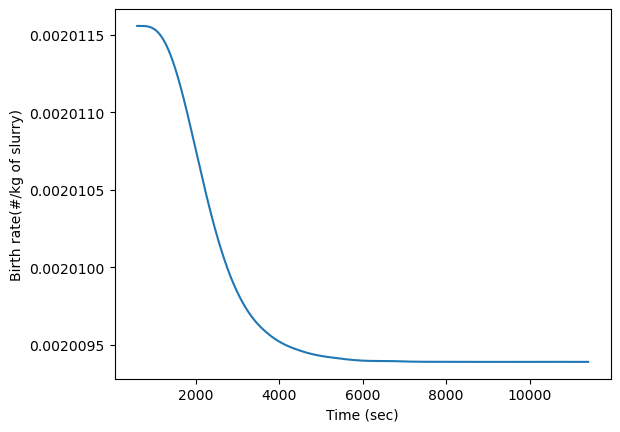

In [4]:
plt.plot(sol.t, kb_opt * ((sol.y[4] - 0.383) / 0.383)**b_opt)
plt.xlabel("Time (sec)")
plt.ylabel("Birth rate(#/kg of slurry)")
plt.show()

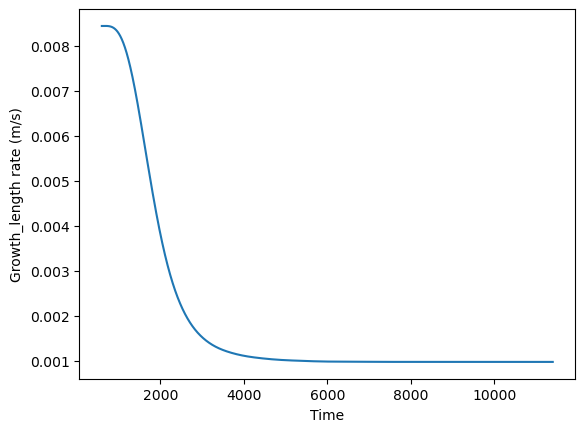

In [5]:
plt.plot(sol.t, A1_opt * ((sol.y[4] - 0.383) / 0.383)**g1_opt)
plt.xlabel("Time")
plt.ylabel("Growth_length rate (m/s)")
plt.show()

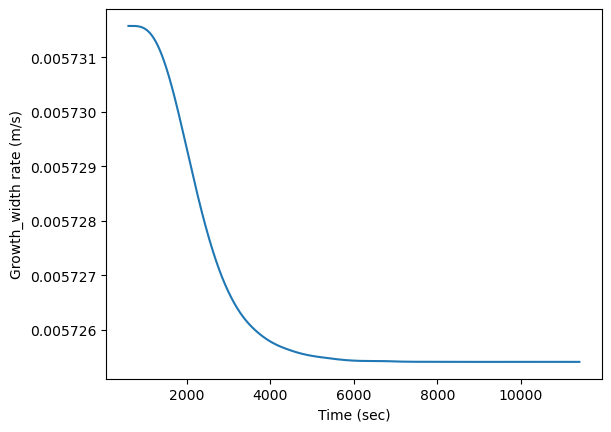

In [6]:
plt.plot(sol.t, A2_opt * ((sol.y[4] - 0.383) / 0.383)**g2_opt)
plt.xlabel("Time (sec)")
plt.ylabel("Growth_width rate (m/s)")
plt.show()

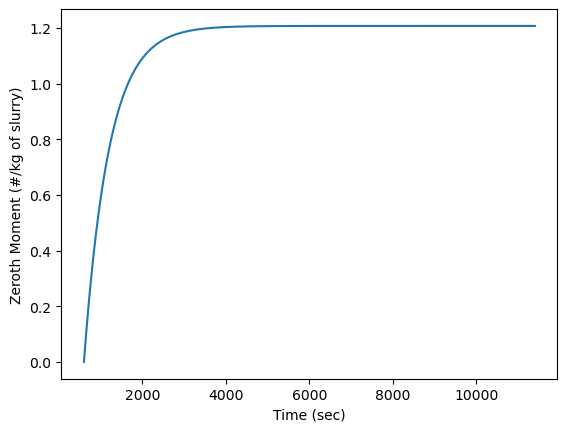

In [7]:
plt.plot(sol.t, sol.y[0], label='Model')
plt.xlabel("Time (sec)")
plt.ylabel("Zeroth Moment (#/kg of slurry)")
plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_3012\1358489055.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(sol.t,sol.y[1]/ sol.y[0], label='Model')


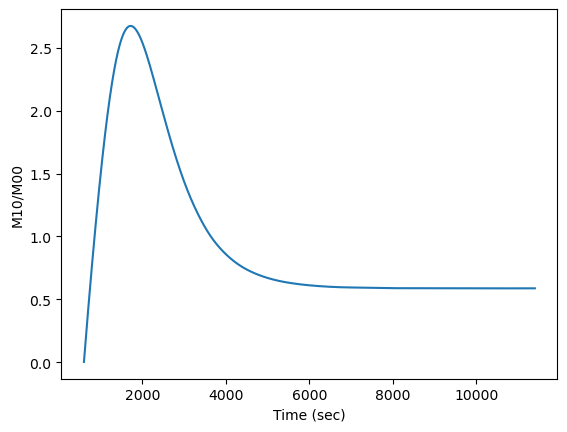

In [8]:
plt.plot(sol.t,sol.y[1]/ sol.y[0], label='Model')
plt.xlabel("Time (sec)")
plt.ylabel("M10/M00")
plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_3012\1277339380.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(sol.t,sol.y[2]/ sol.y[0], label='Model')


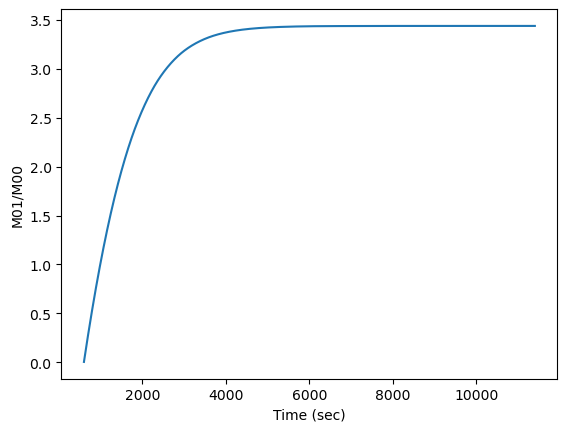

In [10]:
plt.plot(sol.t,sol.y[2]/ sol.y[0], label='Model')
plt.xlabel("Time (sec)")
plt.ylabel("M01/M00")
plt.show()